In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf  


# Simple moving everage
def macd(signals):
    signals['ma1'] = signals['Close'].rolling(window=ma1, min_periods=1).mean()
    signals['ma2'] = signals['Close'].rolling(window=ma2, min_periods=1).mean()
    return signals


# signal generation
def signal_generation(df, method):
    signals = method(df)
    signals['positions'] = 0
    signals.loc[signals.index[ma1:], 'positions'] = np.where(signals['ma1'][ma1:] >= signals['ma2'][ma1:], 1, 0)
    signals['signals'] = signals['positions'].diff()
    signals['oscillator'] = signals['ma1'] - signals['ma2']
    return signals


# plotting the back testing result
def plot(new, ticker):
    fig = plt.figure()
    ax = fig.add_subplot()
    new['Close'].plot(ax=ax, label=ticker)
    ax.plot(new.loc[new['signals'] == 1].index, new['Close'][new['signals'] == 1],
            label='LONG', lw=0, marker='^', c='g')
    ax.plot(new.loc[new['signals'] == -1].index, new['Close'][new['signals'] == -1],
            label='SHORT', lw=0, marker='v', c='r')
    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Positions')
    plt.show()

    fig = plt.figure(figsize=(12, 8))
    cx = fig.add_subplot(211)
    new['oscillator'].plot(kind='bar', color='r')
    plt.grid(True)
    plt.title('MACD Oscillator')
    plt.xticks([])


    bx = fig.add_subplot(212)
    new['ma1'].plot(label='ma1')
    new['ma2'].plot(label='ma2', linestyle=':')
    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Moving Averages')
    plt.show()


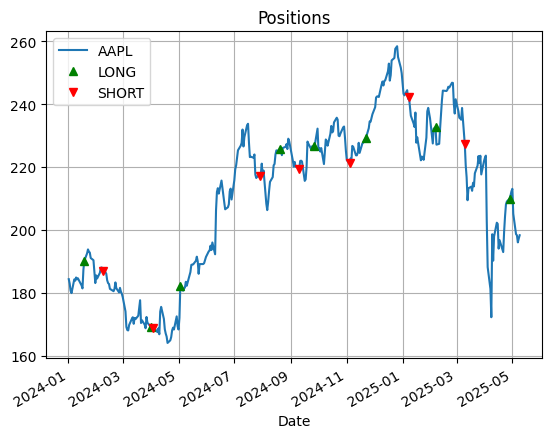

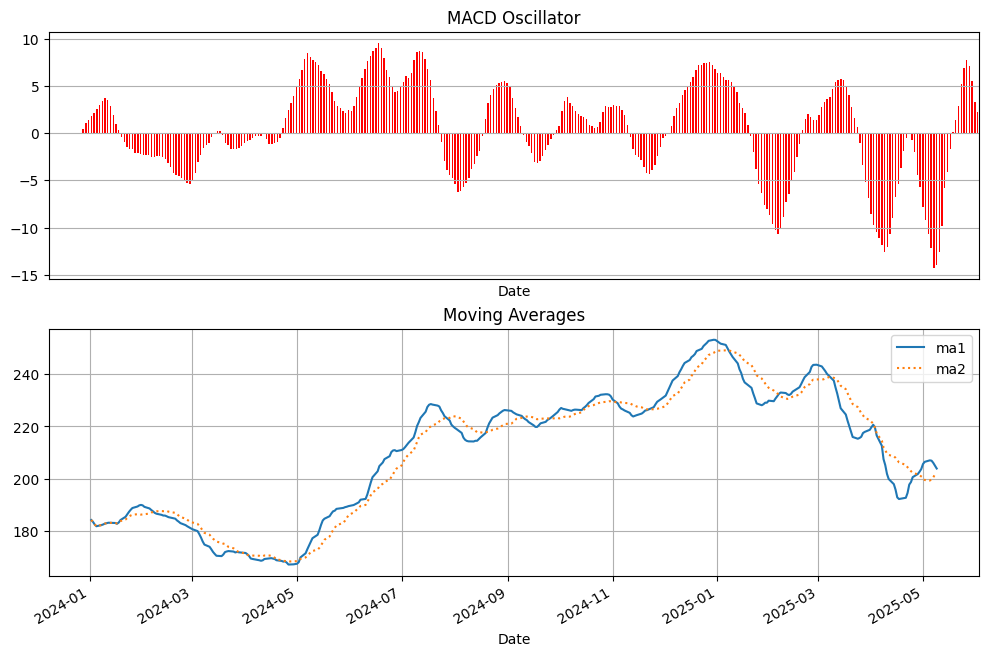

In [34]:
# input
ma1 = 10
ma2 = 21
stdate = '2024-1-1'
eddate = '2025-5-10'
ticker = 'AAPL'

# download data and backtest
df = yf.download(ticker, start=stdate, end=eddate, progress=False)
new = signal_generation(df, macd)
plot(new, ticker)
